Dataset link - https://www.kaggle.com/datasets/uciml/bioassay-datasets

Dataset/Problem : Given certain features predict whether the synthesized drug is a hit (possible to create) or no-hit (not possible to create)

Goal : Given feature value predict if it's hit or no-hit (Classification)

Approach : I've used various model to predict the outcome , howerver all of them failed . One major reason is the dataset is imbalance. However here we only care about reducing type-II error i.e False Positive (Actual =1 , Predicted = 0) as we don't want to miss a potential hit as no-hit . If we consider accuracy score it'll be be high because more than 90% is no-hit but we don't care about them.


List of models we have 

1. baseline model (lowest Type-II error or FP value)
2. transformation + outlier removed model (raw,normalized,standardized)
3. oversampled & undersampled model (raw,normalized,standardized)
4. symmetric model (bias = 0 , using equal hit & non-hit) - This model has been used to predict accuracy(capture variance) of raw data  (raw,normalized,standardized)
5. dimensionality reduced model


**I'm open to any kind suggestion , I would really appriciate your thoughts about improving the model performance ;**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
# all file under input directory

files=[]
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
files.sort()
# odd position is test file & even position is train file
files

['/kaggle/input/bioassay-datasets/AID1284Morered_test.csv',
 '/kaggle/input/bioassay-datasets/AID1284Morered_train.csv',
 '/kaggle/input/bioassay-datasets/AID1284red_test.csv',
 '/kaggle/input/bioassay-datasets/AID1284red_train.csv',
 '/kaggle/input/bioassay-datasets/AID1608Morered_test.csv',
 '/kaggle/input/bioassay-datasets/AID1608Morered_train.csv',
 '/kaggle/input/bioassay-datasets/AID1608red_test.csv',
 '/kaggle/input/bioassay-datasets/AID1608red_train.csv',
 '/kaggle/input/bioassay-datasets/AID362red_test.csv',
 '/kaggle/input/bioassay-datasets/AID362red_train.csv',
 '/kaggle/input/bioassay-datasets/AID373AID439red_test.csv',
 '/kaggle/input/bioassay-datasets/AID373AID439red_train.csv',
 '/kaggle/input/bioassay-datasets/AID373red_test.csv',
 '/kaggle/input/bioassay-datasets/AID373red_train.csv',
 '/kaggle/input/bioassay-datasets/AID439Morered_test.csv',
 '/kaggle/input/bioassay-datasets/AID439Morered_train.csv',
 '/kaggle/input/bioassay-datasets/AID439red_test.csv',
 '/kaggle/inp

In [3]:
train = pd.read_csv(files[7])
test =  pd.read_csv(files[6])
print("train : ",files[7])
print("test : ",files[6])

train :  /kaggle/input/bioassay-datasets/AID1608red_train.csv
test :  /kaggle/input/bioassay-datasets/AID1608red_test.csv


In [4]:
train.head(5)

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.2686,1.218,121.24,6,7,2,364.423,0,0,Inconc
1,0,0,0,0,0,0,0,0,0,0,...,3.3202,0.908,57.53,1,3,2,138.122,0,0,Inconc
2,0,0,0,0,0,0,0,0,0,0,...,3.2172,3.803,89.05,3,5,1,396.549,0,2,Inconc
3,0,0,0,0,0,0,0,0,0,0,...,3.0106,4.858,133.14,10,10,3,668.908,0,0,Inconc
4,0,0,0,0,0,0,0,0,0,0,...,3.4535,4.746,133.52,13,8,4,590.797,0,0,Inconc


In [5]:
test.head(5)

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.1838,5.110,161.21,12,11,4,751.010,0,0,Inconc
1,0,0,0,0,0,0,0,0,0,0,...,3.1935,-3.705,201.63,11,11,4,415.424,0,2,Inconc
2,0,0,0,0,0,0,0,0,0,0,...,3.4254,2.170,92.21,2,5,2,352.452,0,2,Inconc
3,0,0,0,0,0,0,0,0,0,0,...,3.4272,-1.144,227.65,8,12,2,454.519,0,0,Inconc
4,0,0,0,0,0,0,0,0,0,0,...,3.3180,-0.637,181.73,9,12,3,517.564,0,1,Inconc


In [6]:
print(train.Outcome.unique())
print(test.Outcome.unique())

['Inconc' 'Active']
['Inconc' 'Active']


In [7]:
train.isnull().sum().sort_values(ascending=False)

NEG_01_NEG    0
ARC_05_ARC    0
HBA_05_HYP    0
HBA_06_HYP    0
HBA_07_HYP    0
             ..
POS_02_ARC    0
POS_03_ARC    0
POS_04_ARC    0
POS_05_ARC    0
Outcome       0
Length: 155, dtype: int64

In [8]:
# check if train & test data contains null value or not
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [9]:
# lets check numerical & categorical column names

numerical = train.select_dtypes(include=np.number).columns
categorical = train.select_dtypes(include='object').columns
print("numerical ",numerical)
print("categorical ",categorical)

numerical  Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_L_1.00', 'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA',
       'NumHBD', 'MW', 'BBB', 'BadGroup'],
      dtype='object', length=154)
categorical  Index(['Outcome'], dtype='object')


In [10]:
# let's check our possible outcomes
train.Outcome.unique()

array(['Inconc', 'Active'], dtype=object)

In [11]:
# convert categorical to numerical
res = {'Inconc':0, 'Active':1}
train.Outcome=train.Outcome.map(res)
train.Outcome.unique()

array([0, 1])

In [12]:
# convert categorical to numerical
res = {'Inconc':0, 'Active':1}
test.Outcome=test.Outcome.map(res)
test.Outcome.unique()

array([0, 1])

In [13]:
descriptive_stat = train.describe()
descriptive_stat

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,...,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.020556,0.004837,0.003628,0.038694,0.014510,0.002418,0.001209,0.003628,0.002418,0.001209,...,3.411933,1.816764,84.122104,4.799274,5.160822,2.090689,326.905348,0.366385,0.449819,0.066505
std,0.141979,0.069420,0.060156,0.192982,0.119654,0.049147,0.034773,0.060156,0.049147,0.034773,...,0.389432,2.616549,72.263005,4.404582,4.314738,2.525463,171.319873,0.482108,0.740286,0.249314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.424900,-9.499000,0.000000,0.000000,0.000000,0.000000,47.057000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.277250,0.380000,40.540000,2.000000,3.000000,1.000000,220.775000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.459700,1.803000,66.400000,4.000000,4.000000,2.000000,299.355000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.651050,3.211000,103.755000,6.000000,6.000000,3.000000,388.375000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.172000,14.512000,734.460000,47.000000,44.000000,23.000000,1625.920000,1.000000,4.000000,1.000000


In [14]:
# as we can see few columns have std values , let's check them
bool_col_1 = descriptive_stat.loc['std']>1
bool_col_2 = descriptive_stat.loc['std']>2
bool_col_3 = descriptive_stat.loc['std']>3
col_1=[]
col_2=[]
col_3=[]
for i,x in enumerate(descriptive_stat.columns):
    if bool_col_1[i]==True:
        col_1.append(x)
        
for i,x in enumerate(descriptive_stat.columns):
    if bool_col_2[i]==True:
        col_2.append(x)

for i,x in enumerate(descriptive_stat.columns):
    if bool_col_3[i]==True:
        col_3.append(x)
        

print("more than 1 sigma",col_1)
print("more than 2 sigma",col_2)
print("more than 3 sigma",col_3)

more than 1 sigma ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']
more than 2 sigma ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']
more than 3 sigma ['PSA', 'NumRot', 'NumHBA', 'MW']


 **['XLogP','NumHBD']** lies between 2 sigma and 3 sigma away from mean &  **['PSA', 'NumRot', 'NumHBA', 'MW']** lies more than 3 sigma away from mean , we need to Normalize or Standardize
 
 
 **Normalize** : if data data doesn't have Gaussian distribution 
 
 **Standardize** : if data have Gaussian distribution

In [15]:
import scipy.stats as stat
import pylab

In [16]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Inconclusive %  93.34945586457074
Active %  6.6505441354292625


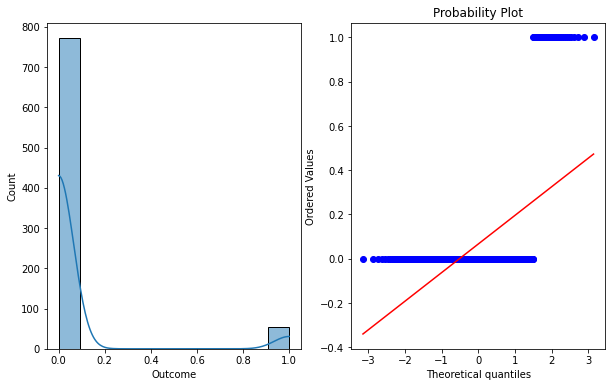

In [17]:
# now let's check the distribution of Outcome
print("Inconclusive % ",train[train['Outcome']==0].value_counts().sum()*100/len(train))
print("Active % ",train[train['Outcome']==1].value_counts().sum()*100/len(train))
plot_data(train,'Outcome')

 so as we can see the distribution is asymmetric , we need to balance the datset without
 hampering model performance

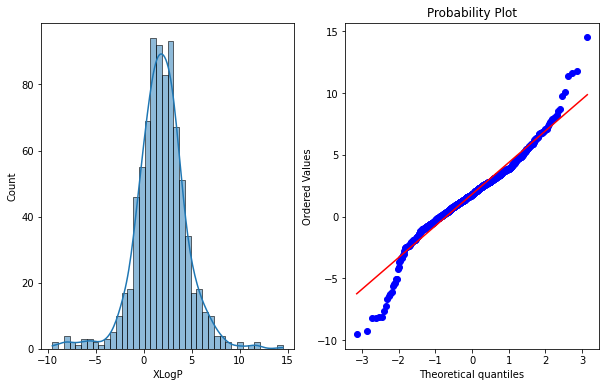

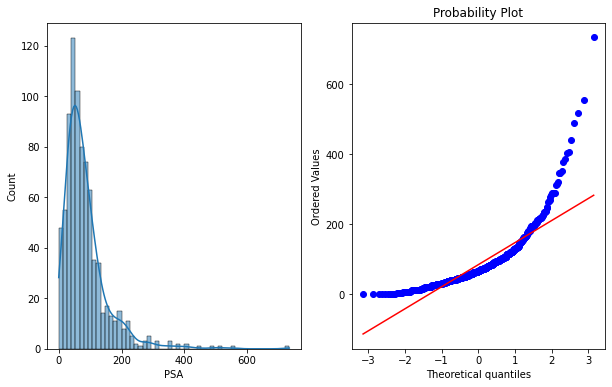

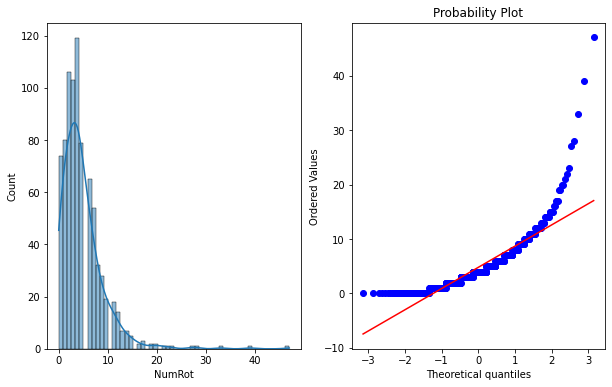

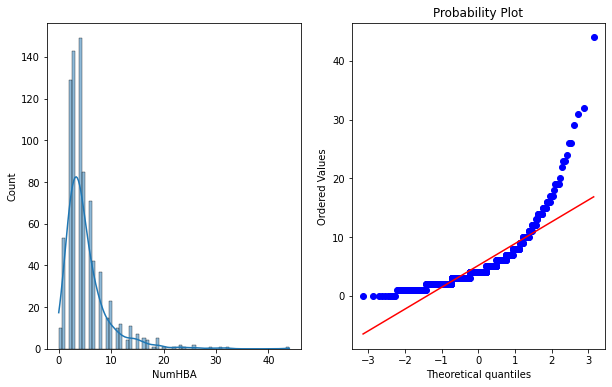

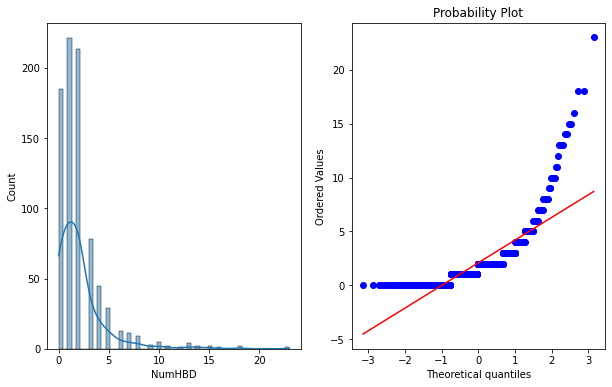

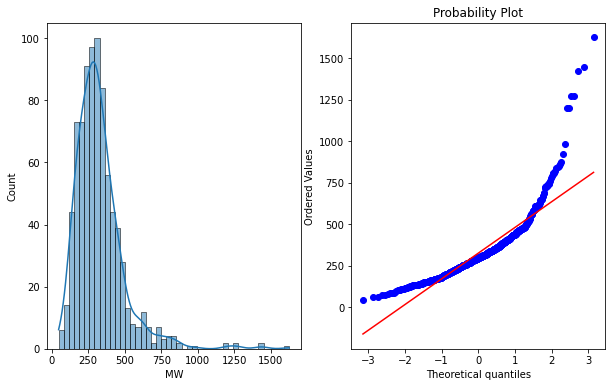

In [18]:
for x in col_1:
    plot_data(train,x)

So except XlogP rest are right/positive skewed distribution , we can make them normal by using 
1. square root
2. cube root
3. log

In [19]:
#pd.set_option('display.max_rows',155)

In [20]:
# check outliers for each columns

q1 = np.percentile(train,25)
q3 = np.percentile(train,75)

iqr = q3 - q1 
lb = q1 - 1.5 * iqr
ub = q3 + 1.5 * iqr
mask = (train > ub) | (train < lb)
outliers = pd.Series(mask.sum().sort_values(ascending=False))
outliers

WBN_EN_H_0.25    827
WBN_LP_L_0.25    827
WBN_GC_L_0.25    827
WBN_GC_H_0.25    827
WBN_GC_L_0.50    827
                ... 
POS_03_POS         1
POS_07_POS         1
NEG_06_POS         1
POS_01_HBD         0
POS_02_HBD         0
Length: 155, dtype: int64

As we can see most of them are outliers so just removing them should be ok for general case , however as the the problem definition says - for most of drug discovery trail is false hit , we're just getting that statement here . 

**So should we remove them or not ?**

There is another way around this problem - Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [22]:
X = train.iloc[:,:-1].values
y = train.iloc[:,-1].values

In [23]:
#X.info()

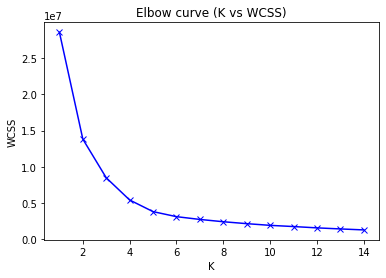

In [24]:
wcss = []  # within cluster sum of square

for i in range(1,15):
    clus = KMeans(n_clusters = i,init="k-means++", random_state=0)
    clus.fit(X)
    wcss.append(clus.inertia_)
    
plt.plot(range(1,15),wcss,'bx-')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow curve (K vs WCSS)")
plt.show()

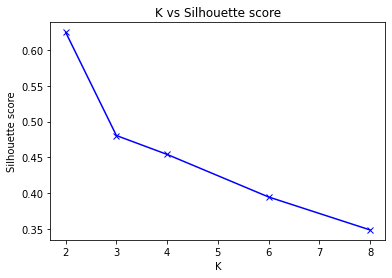

In [25]:
range_n_clusters = [2, 3, 4, 6, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('K') 
plt.ylabel('Silhouette score') 
plt.title('K vs Silhouette score')
plt.show()

Let's find the best K using silhouette plot

For n_clusters = 2 The average silhouette_score is : 0.6246553474055451
For n_clusters = 3 The average silhouette_score is : 0.4777848378013748
For n_clusters = 4 The average silhouette_score is : 0.45413702373212567
For n_clusters = 6 The average silhouette_score is : 0.3944151391775814
For n_clusters = 8 The average silhouette_score is : 0.346711446925884


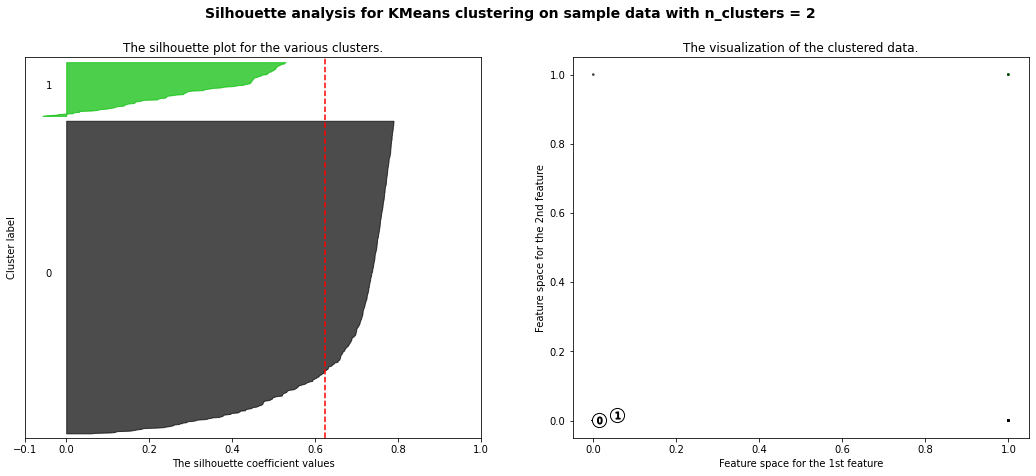

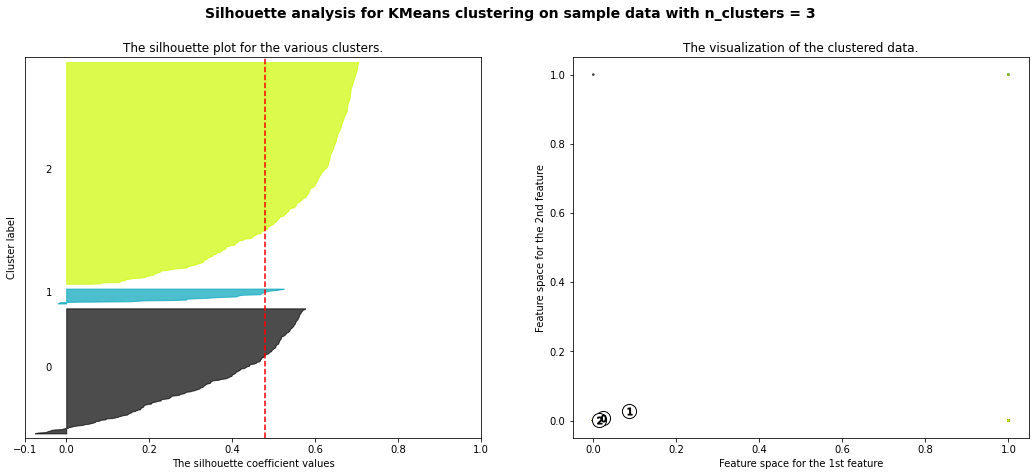

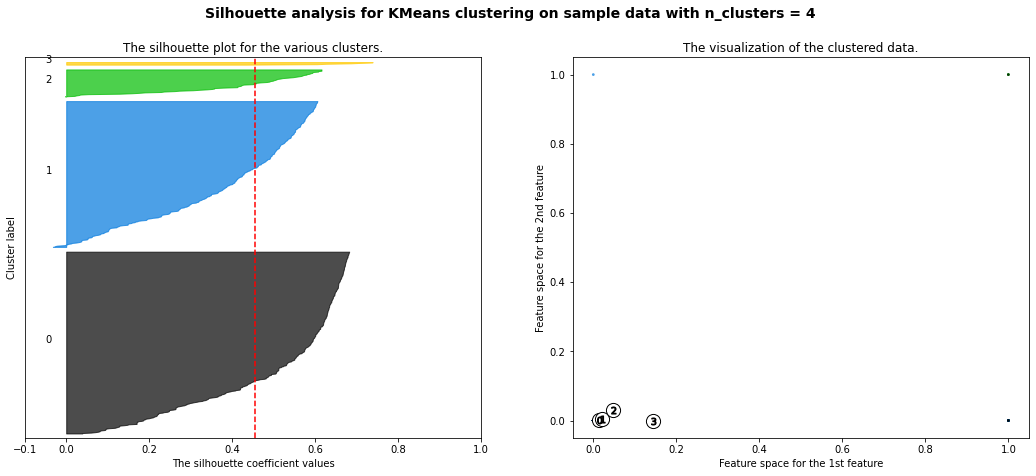

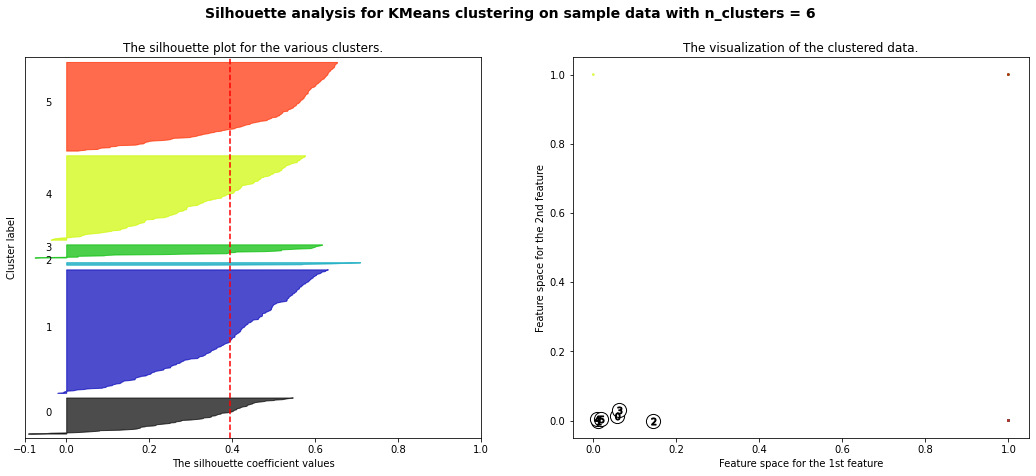

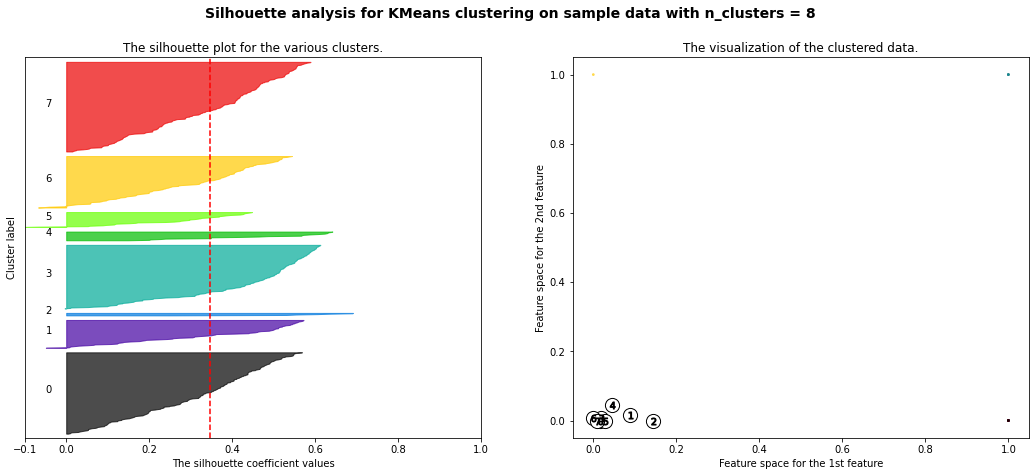

In [26]:

range_n_clusters = [2, 3, 4, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

So as we can see not a sigle one is perfect but if we have to pick one we'll pick k = 2 or 3

**lets create a baseline model - imbalance model , lots of outlier - RandomForest**

In [27]:
X = train.drop('Outcome',axis=1)
y = train.loc[:,'Outcome']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Columns: 154 entries, NEG_01_NEG to BadGroup
dtypes: float64(27), int64(127)
memory usage: 995.1 KB


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix,classification_report

Thus in binary classification, the count of true negatives is C[0,0], false negatives is C[1,0], true positives is C[1,1] and false positives is C[0,1].

      
      Actual (0,1) --> right
      Predicted (0,1) 
          |
          |
          V
         down
         
        |  0 | 1
     -------------   
      0 | TN | FP
     ------------- 
      1 | FN | TP

List of models we have 

1. baseline model (lowest Type-II error or FP value)
2. transformation + outlier removed model (raw,normalized,standardized)
3. oversampled & undersampled model (raw,normalized,standardized)
4. symmetric model (bias = 0 , using equal hit & non-hit) - This model has been used to predict accuracy(capture variance) of raw data  (raw,normalized,standardized)
5. dimensionality reduced model

In [30]:
models = []

**baseline model (lowest Type-II error or FP value)**

In [31]:
column_values = X.columns
column_values

Index(['NEG_01_NEG', 'NEG_02_NEG', 'NEG_03_NEG', 'NEG_04_NEG', 'NEG_05_NEG',
       'NEG_06_NEG', 'NEG_07_NEG', 'NEG_03_POS', 'NEG_04_POS', 'NEG_05_POS',
       ...
       'WBN_LP_L_1.00', 'WBN_LP_H_1.00', 'XLogP', 'PSA', 'NumRot', 'NumHBA',
       'NumHBD', 'MW', 'BBB', 'BadGroup'],
      dtype='object', length=154)

In [32]:

kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))



Label Distributions: 

[0.93353474 0.06646526]
[0.93333333 0.06666667]


In [33]:
import time

Here we'll use successive halving search (HalvingGridSearchCV and HalvingRandomSearchCV) iteratively to choose the best parameter combination out of multiple candidates

In [34]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV


In [35]:
clf = RandomForestClassifier(random_state=0)

In [36]:
X = train.drop('Outcome',axis=1)
y = train.loc[:,'Outcome']

In [37]:
param_dist = {
    "n_estimators" : range(50,300,10),
    "max_depth": [5, None],
    "max_features": randint(1, 30),
    "min_samples_split": randint(2, 20),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf" : randint(1,100)
}
rsh = HalvingRandomSearchCV(
    estimator=clf, param_distributions=param_dist, factor=2, random_state=0
)
rsh.fit(X, y)

HalvingRandomSearchCV(estimator=RandomForestClassifier(random_state=0),
                      factor=2,
                      param_distributions={'bootstrap': [True, False],
                                           'criterion': ['gini', 'entropy'],
                                           'max_depth': [5, None],
                                           'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5338e21250>,
                                           'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5338e1add0>,
                                           'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f5338e1af90>,
                                           'n_estimators': range(50, 300, 10)},
                      random_state=0)

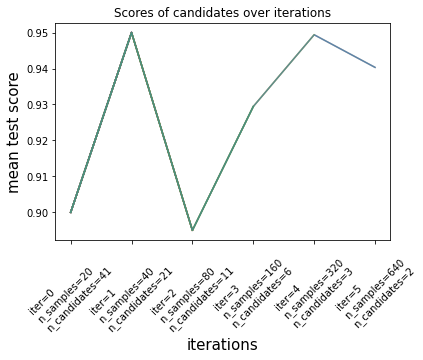

<Figure size 720x720 with 0 Axes>

In [38]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]
plt.figure(figsize=(10,10))
ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("mean test score", fontsize=15)
ax.set_xlabel("iterations", fontsize=15)
plt.tight_layout()
plt.show()

So best score is at 

iter = 1, n_samples = 40, n_candidates = 21   

iter=4,n_samples=320,n_candidates=3

with best features

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 24,
 'min_samples_leaf': 36,
 'min_samples_split': 13}

In [39]:
rsh.best_params_ 

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 39,
 'min_samples_split': 10,
 'n_estimators': 250}

In [40]:
clf = RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=39,
                             max_features=6,random_state=0)

In [41]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, min_samples_leaf=39,
                       min_samples_split=10, n_estimators=250, random_state=0)

**Detection error tradeoff (DET) curve**

DET curves are commonly plotted in normal deviate scale. To achieve this the DET display transforms the error rates as returned by the det_curve and the axis scale using scipy.stats.norm.

DET curve tells us at which rate FN (Type-I error) rate will improve when willing to accept an increase in FP (Type-II error) rate or vice-versa



In [42]:
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

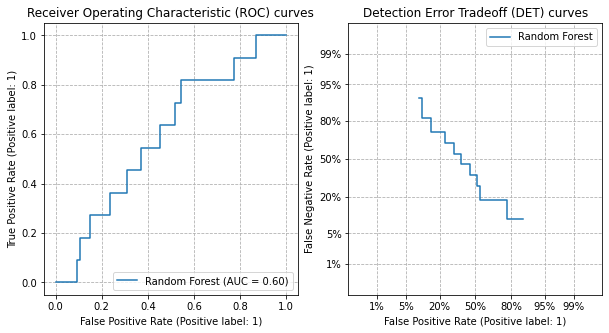

In [43]:

fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name="Random Forest")
DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name="Random Forest")

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [44]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Feature importance based on Mean decrease in impurity

Elapsed time to compute the importances: 0.028 seconds
WBN_EN_L_0.75    0.048294
WBN_EN_L_1.00    0.042534
WBN_EN_L_0.25    0.039921
WBN_GC_L_0.75    0.039486
WBN_EN_L_0.50    0.038141
                   ...   
HBA_06_ARC       0.000000
POS_05_HBD       0.000000
POS_06_HBD       0.000000
POS_07_HBD       0.000000
NEG_01_NEG       0.000000
Length: 154, dtype: float64


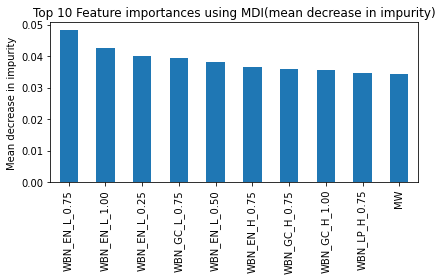

In [45]:
#column_values = X.columns
feature_names = [x for x in column_values]
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top_10_features = forest_importances[:10]
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=std[:10], ax=ax)
ax.set_title("Top 10 Feature importances using MDI(mean decrease in impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(forest_importances)

In [46]:
cf_mat=confusion_matrix(y_train,y_train_pred)
print("Confusion Matrix for train")
print(cf_mat)
print("Classification train report :\n",classification_report(y_train,y_train_pred),end="\n")
cf_mat=confusion_matrix(y_test,y_test_pred)
print("Confusion Matrix for test")
print(cf_mat)
print("Classification test report :\n",classification_report(y_test,y_test_pred),end="\n")

Confusion Matrix for train
[[618   0]
 [ 44   0]]
Classification train report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       618
           1       0.00      0.00      0.00        44

    accuracy                           0.93       662
   macro avg       0.47      0.50      0.48       662
weighted avg       0.87      0.93      0.90       662

Confusion Matrix for test
[[154   0]
 [ 11   0]]
Classification test report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       154
           1       0.00      0.00      0.00        11

    accuracy                           0.93       165
   macro avg       0.47      0.50      0.48       165
weighted avg       0.87      0.93      0.90       165



So here we can see there is no case of Orginal = 1 but Predict = 0 , that's a relif as we haven't missed any actual hit 


So we have our baseline model , lets try to optimize the performance

List of models we have 

1. baseline model (lowest Type-II error or FP value)

In [47]:
# add this model to list 

models.append(clf)

**transformation + outlier removed model (raw,normalized,standardized)**

In [48]:
df = train.copy(deep=True)
print(df.isnull().values.any())
df.isnull().sum().sort_values(ascending=False)

False


NEG_01_NEG    0
ARC_05_ARC    0
HBA_05_HYP    0
HBA_06_HYP    0
HBA_07_HYP    0
             ..
POS_02_ARC    0
POS_03_ARC    0
POS_04_ARC    0
POS_05_ARC    0
Outcome       0
Length: 155, dtype: int64

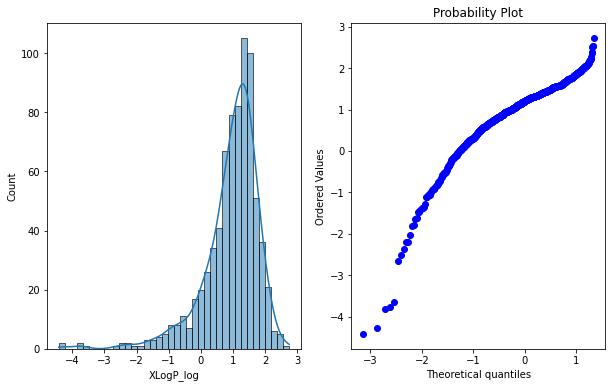

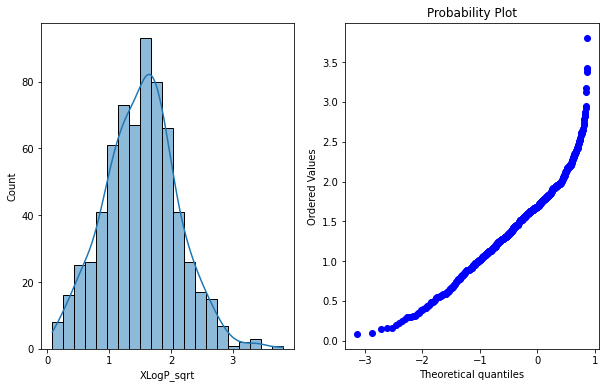

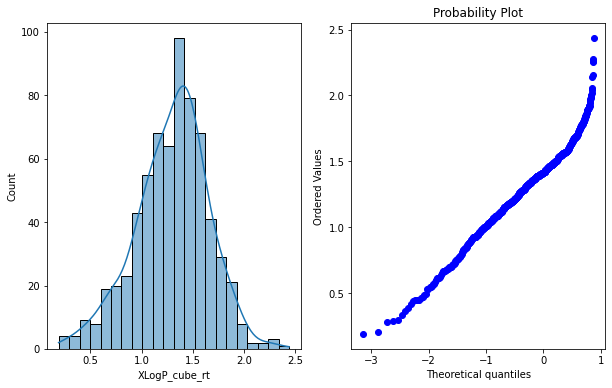

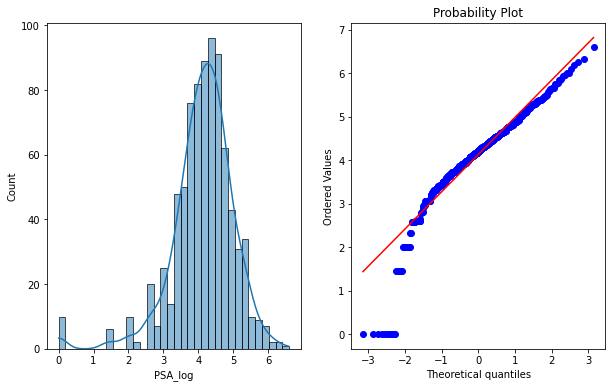

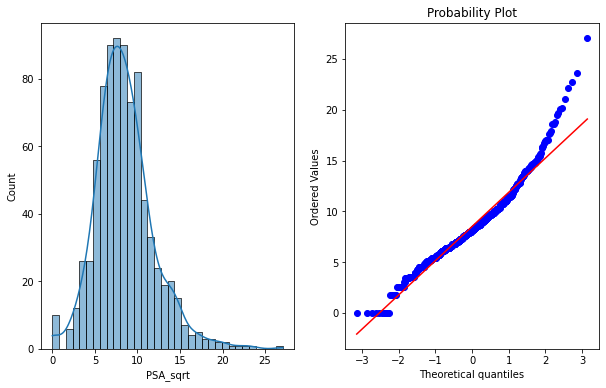

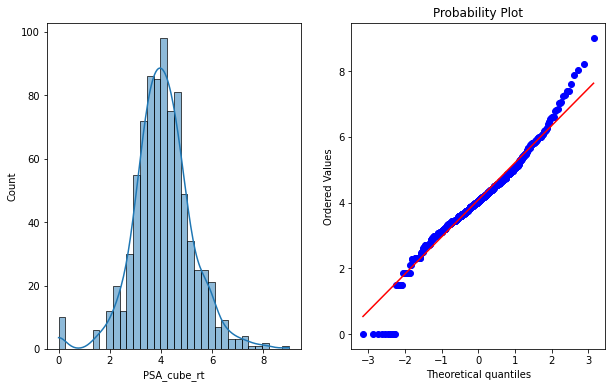

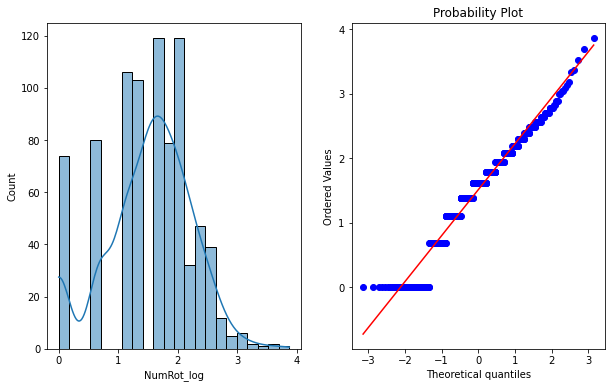

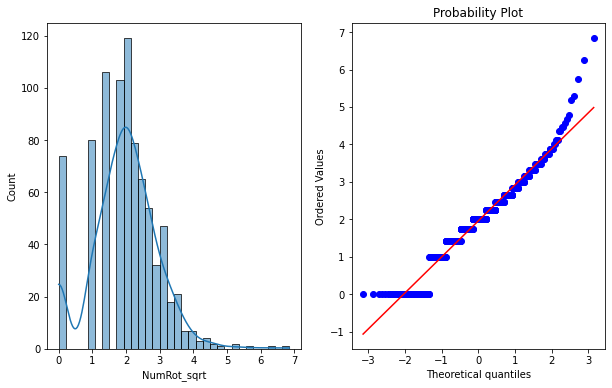

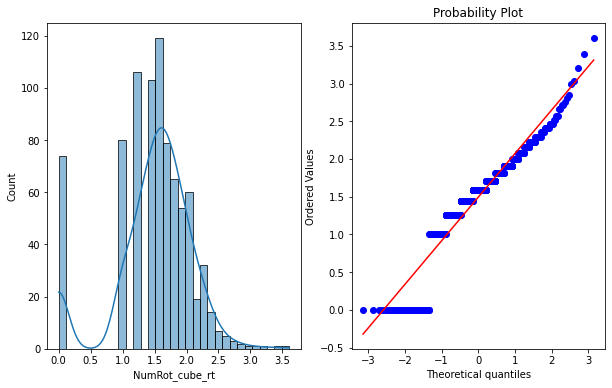

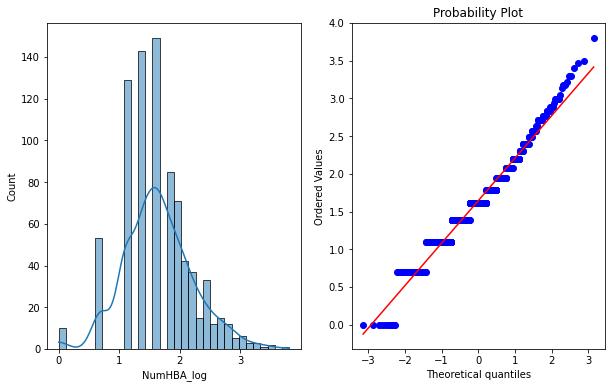

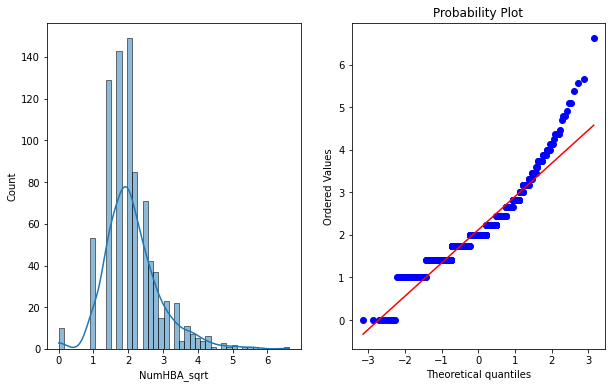

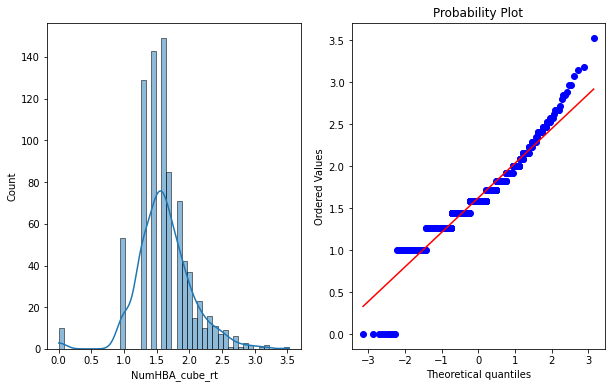

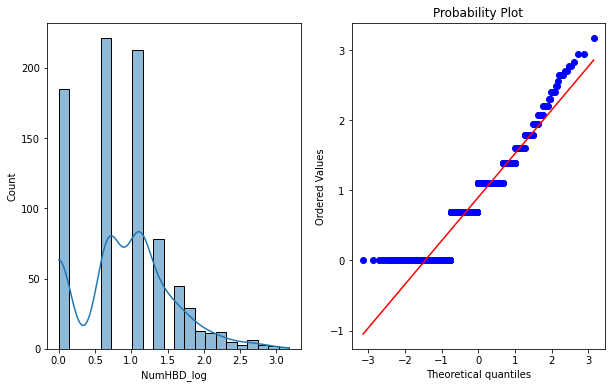

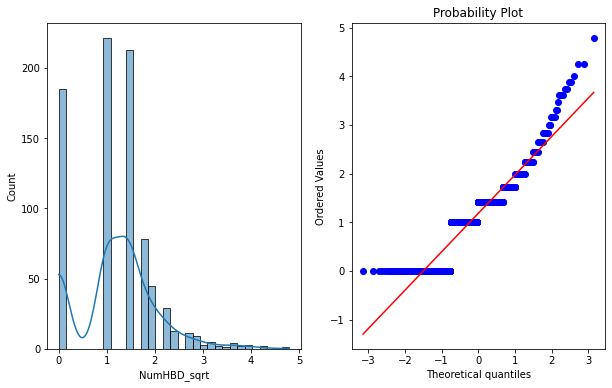

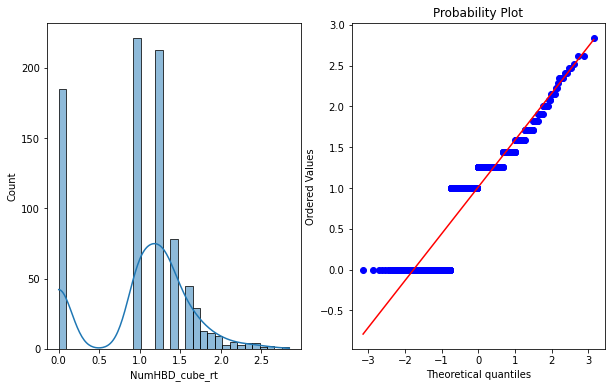

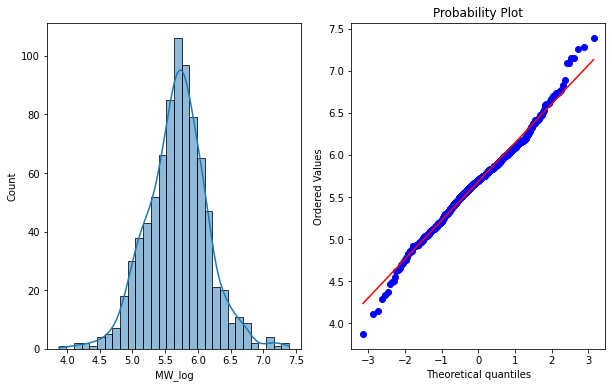

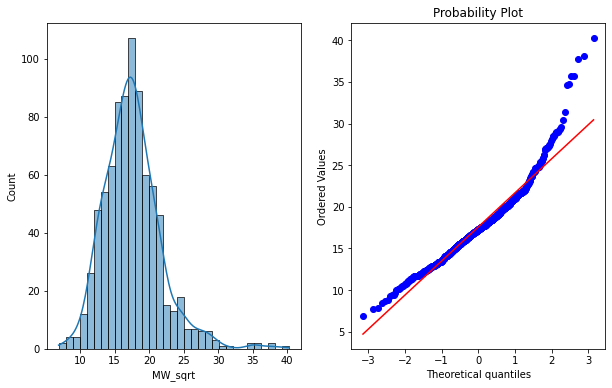

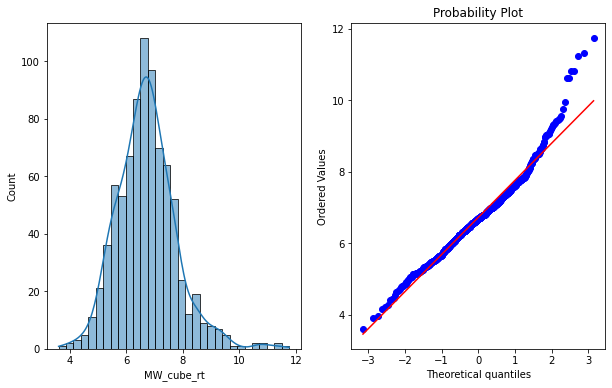

In [49]:
cols = ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']

for x in cols:
    df[x+'_log'] = np.log1p(df[x])
    plot_data(df,x+'_log')
    df[x+'_sqrt'] = df[x]**(1/2)
    plot_data(df,x+'_sqrt')
    df[x+'_cube_rt'] = df[x]**(1/3)
    plot_data(df,x+'_cube_rt')

In [50]:
for c in cols:
    df.drop(c+'_log',inplace=True,axis=1)
    df.drop(c+'_sqrt',inplace=True,axis=1)
    df.drop(c+'_cube_rt',inplace=True,axis=1)

In [51]:
print(df.isnull().values.any())
df.isnull().sum().sort_values(ascending=False)

False


NEG_01_NEG    0
ARC_05_ARC    0
HBA_05_HYP    0
HBA_06_HYP    0
HBA_07_HYP    0
             ..
POS_02_ARC    0
POS_03_ARC    0
POS_04_ARC    0
POS_05_ARC    0
Outcome       0
Length: 155, dtype: int64

so for MW it's log & for the rest its cube root transfomation

cols = ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD', 'MW']

['XLogP_cube_rt','PSA_cube_rt','NumRot_cube_rt','NumHBA_cube_rt','NumHBD_cube_rt','MW_log']

let's drop 
redundant features : forest_importances < 7.004040e-07


no impact features : outliers.values > 743  i.e more than 95% is outlier

In [52]:
cols = ['XLogP', 'PSA', 'NumRot', 'NumHBA', 'NumHBD']
df['MW'] = np.log1p(df['MW'])
for x in cols:
    df[x] = df[x]**(1/3)

In [53]:
df.XLogP.fillna(df.XLogP.mode()[0],inplace=True)

In [54]:
print(df.isnull().values.any())
df.isnull().sum().sort_values(ascending=False)

False


NEG_01_NEG    0
ARC_05_ARC    0
HBA_05_HYP    0
HBA_06_HYP    0
HBA_07_HYP    0
             ..
POS_02_ARC    0
POS_03_ARC    0
POS_04_ARC    0
POS_05_ARC    0
Outcome       0
Length: 155, dtype: int64

In [55]:
redundant = forest_importances[forest_importances < 7.004040e-07].index.to_list()
redundant

['HBD_03_HBD',
 'NEG_02_ARC',
 'NEG_04_ARC',
 'NEG_05_ARC',
 'NEG_06_ARC',
 'NEG_07_ARC',
 'NEG_02_HYP',
 'NEG_03_HYP',
 'NEG_04_HYP',
 'NEG_05_HYP',
 'NEG_06_HYP',
 'HYP_07_HYP',
 'HYP_06_HYP',
 'HYP_05_HYP',
 'HYP_04_HYP',
 'HYP_03_HYP',
 'NEG_07_HYP',
 'POS_03_POS',
 'ARC_07_HYP',
 'ARC_06_HYP',
 'NEG_03_ARC',
 'NEG_07_HBA',
 'ARC_04_HYP',
 'NEG_06_POS',
 'NEG_03_NEG',
 'NEG_04_NEG',
 'NEG_05_NEG',
 'NEG_06_NEG',
 'NEG_07_NEG',
 'NEG_03_POS',
 'NEG_04_POS',
 'NEG_05_POS',
 'NEG_01_HBD',
 'NEG_06_HBA',
 'NEG_02_HBD',
 'NEG_03_HBD',
 'NEG_04_HBD',
 'NEG_05_HBD',
 'NEG_06_HBD',
 'NEG_07_HBD',
 'NEG_03_HBA',
 'NEG_04_HBA',
 'ARC_05_HYP',
 'ARC_02_HYP',
 'ARC_03_HYP',
 'POS_05_ARC',
 'POS_07_HBA',
 'HBD_06_HYP',
 'POS_02_ARC',
 'POS_03_ARC',
 'POS_04_ARC',
 'HBD_07_ARC',
 'HBD_06_ARC',
 'NEG_02_NEG',
 'POS_06_ARC',
 'HBD_05_HBD',
 'POS_07_ARC',
 'POS_02_HYP',
 'POS_03_HYP',
 'POS_04_HYP',
 'POS_05_HYP',
 'HBD_03_HBA',
 'POS_06_HYP',
 'POS_07_HYP',
 'POS_06_HBA',
 'POS_05_HBA',
 'POS_04_H

In [56]:
print(outliers.index)
print(outliers.values)

Index(['WBN_EN_H_0.25', 'WBN_LP_L_0.25', 'WBN_GC_L_0.25', 'WBN_GC_H_0.25',
       'WBN_GC_L_0.50', 'WBN_GC_H_0.50', 'WBN_GC_L_0.75', 'WBN_GC_H_0.75',
       'WBN_GC_L_1.00', 'WBN_GC_H_1.00',
       ...
       'NEG_03_HYP', 'NEG_04_POS', 'POS_03_HBA', 'NEG_07_NEG', 'NEG_05_POS',
       'POS_03_POS', 'POS_07_POS', 'NEG_06_POS', 'POS_01_HBD', 'POS_02_HBD'],
      dtype='object', length=155)
[827 827 827 827 827 827 827 827 827 827 827 827 827 827 827 827 827 827
 827 827 827 827 827 827 827 827 817 817 753 642 303 278 182 138 137 132
 132 130 130 128 127 121 120 115 107  95  95  92  91  89  88  88  85  84
  83  82  81  78  78  77  75  75  72  70  67  67  66  66  63  63  61  60
  59  57  55  51  51  49  48  46  46  45  42  42  42  40  40  39  37  36
  35  35  34  32  30  30  30  28  28  27  27  27  23  23  22  21  20  20
  19  19  19  18  18  17  17  17  17  16  16  16  15  14  14  13  13  13
  13  12  12  12   8   8   7   7   7   6   5   5   4   3   3   3   3   2
   2   2   2   1   1   1 

In [57]:
no_impact = outliers[outliers.values > 743].index     # 95%
no_impact

Index(['WBN_EN_H_0.25', 'WBN_LP_L_0.25', 'WBN_GC_L_0.25', 'WBN_GC_H_0.25',
       'WBN_GC_L_0.50', 'WBN_GC_H_0.50', 'WBN_GC_L_0.75', 'WBN_GC_H_0.75',
       'WBN_GC_L_1.00', 'WBN_GC_H_1.00', 'WBN_EN_L_0.25', 'WBN_EN_L_0.50',
       'WBN_EN_H_0.50', 'WBN_EN_H_0.75', 'WBN_EN_L_1.00', 'WBN_EN_H_1.00',
       'WBN_EN_L_0.75', 'WBN_LP_H_0.25', 'XLogP', 'WBN_LP_H_0.50', 'MW',
       'WBN_LP_L_0.75', 'WBN_LP_L_0.50', 'WBN_LP_H_0.75', 'WBN_LP_L_1.00',
       'WBN_LP_H_1.00', 'PSA', 'NumHBA', 'NumRot'],
      dtype='object')

In [58]:
# drop outliers 

df.drop(redundant,inplace=True,axis=1,errors='ignore')
df.drop(no_impact,inplace=True,axis=1,errors='ignore')
df.columns

Index(['NEG_05_HBA', 'HBD_04_HBD', 'HBD_06_HBD', 'HBD_07_HBD', 'HBD_04_HBA',
       'HBD_05_HBA', 'HBD_06_HBA', 'HBD_07_HBA', 'HBD_02_ARC', 'HBD_03_ARC',
       'HBD_04_ARC', 'HBD_05_ARC', 'HBD_02_HYP', 'HBD_03_HYP', 'HBD_04_HYP',
       'HBD_05_HYP', 'HBD_07_HYP', 'HBA_03_HBA', 'HBA_04_HBA', 'HBA_05_HBA',
       'HBA_06_HBA', 'HBA_07_HBA', 'HBA_03_ARC', 'HBA_04_ARC', 'HBA_05_ARC',
       'HBA_02_HYP', 'HBA_03_HYP', 'HBA_04_HYP', 'HBA_05_HYP', 'HBA_06_HYP',
       'HBA_07_HYP', 'ARC_01_ARC', 'ARC_03_ARC', 'ARC_04_ARC', 'HYP_01_HYP',
       'HYP_02_HYP', 'NumHBD', 'BBB', 'BadGroup', 'Outcome'],
      dtype='object')

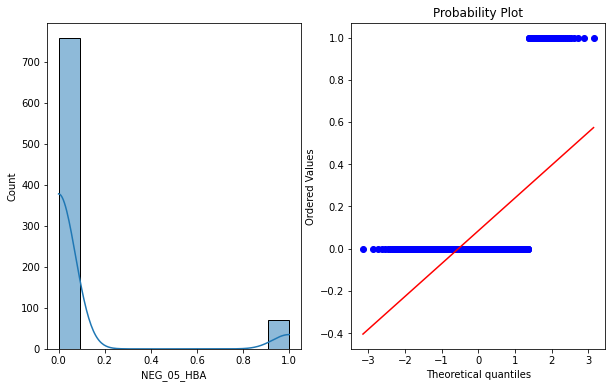

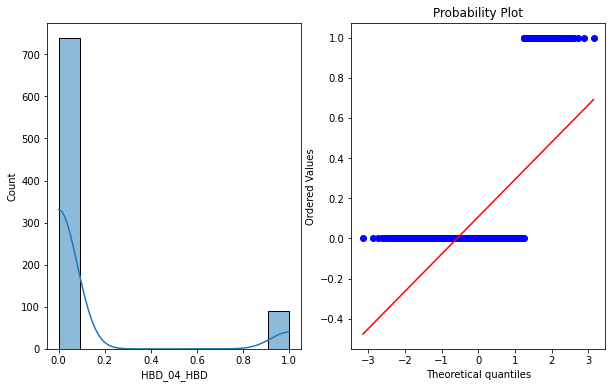

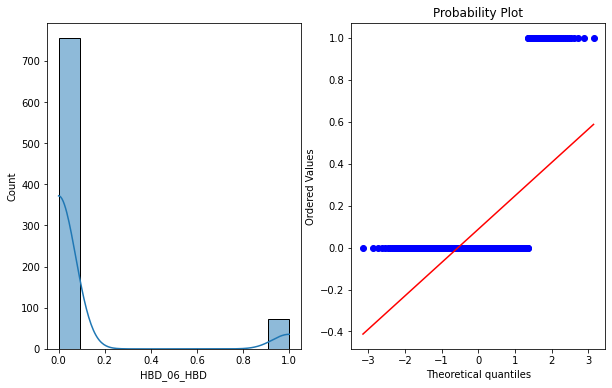

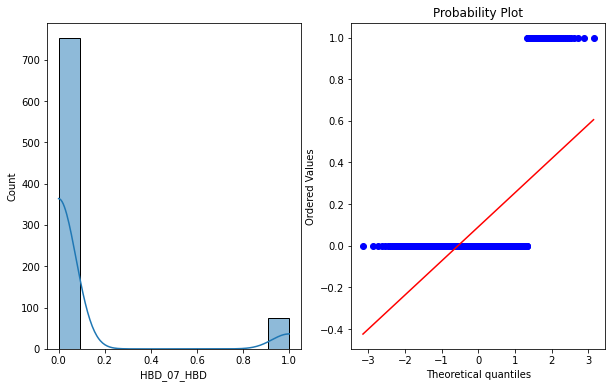

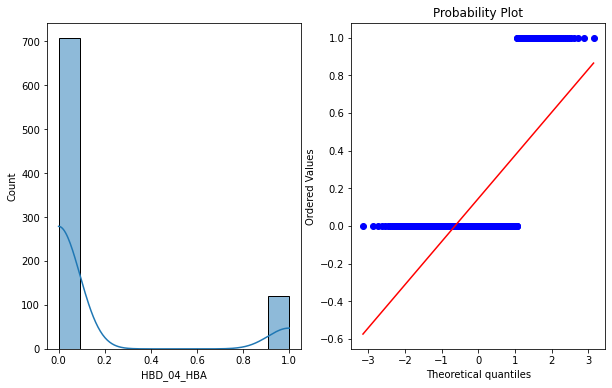

In [59]:
for x in df.columns[:5]:
    plot_data(df,x)

In [60]:
skewness = df.skew().sort_values(ascending=False)
skew_index = (skewness > 3).index
skew_index

Index(['Outcome', 'HBD_04_ARC', 'HBD_07_HYP', 'HBD_03_HYP', 'HYP_02_HYP',
       'HBD_05_HYP', 'HBD_05_ARC', 'HBD_04_HYP', 'NEG_05_HBA', 'HBD_06_HBD',
       'HBD_07_HBD', 'HBA_04_HBA', 'HBD_03_ARC', 'HBA_07_HBA', 'HBA_07_HYP',
       'HBA_05_HYP', 'HBA_06_HYP', 'HYP_01_HYP', 'ARC_04_ARC', 'HBD_04_HBD',
       'HBD_02_HYP', 'HBA_03_HYP', 'HBA_05_ARC', 'HBA_05_HBA', 'HBD_07_HBA',
       'HBD_06_HBA', 'HBD_04_HBA', 'HBA_02_HYP', 'ARC_03_ARC', 'HBA_06_HBA',
       'BadGroup', 'HBD_05_HBA', 'HBA_04_ARC', 'ARC_01_ARC', 'HBA_04_HYP',
       'HBD_02_ARC', 'HBA_03_ARC', 'HBA_03_HBA', 'BBB', 'NumHBD'],
      dtype='object')

In [61]:
# for x in skew_index:
#     df[x]=np.log1p(df[x])
#     df[x] = df[x]**(1/3)

In [62]:
# skewness_log = df.skew().sort_values(ascending=False)
# skew_index_log = (skewness_log > 3).index
# skew_index_log

No impact of transformation - data is too discrete , we have to apply oversampling & undersampleing 

If we perform  transformation we've to take extra care of continuous & discrete variable along with data type np.float32 may raise error at the time of train_test_split

In [63]:
X = df.drop('Outcome',axis=1)
y = df.loc[:,'Outcome']
X.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NEG_05_HBA  827 non-null    int64  
 1   HBD_04_HBD  827 non-null    int64  
 2   HBD_06_HBD  827 non-null    int64  
 3   HBD_07_HBD  827 non-null    int64  
 4   HBD_04_HBA  827 non-null    int64  
 5   HBD_05_HBA  827 non-null    int64  
 6   HBD_06_HBA  827 non-null    int64  
 7   HBD_07_HBA  827 non-null    int64  
 8   HBD_02_ARC  827 non-null    int64  
 9   HBD_03_ARC  827 non-null    int64  
 10  HBD_04_ARC  827 non-null    int64  
 11  HBD_05_ARC  827 non-null    int64  
 12  HBD_02_HYP  827 non-null    int64  
 13  HBD_03_HYP  827 non-null    int64  
 14  HBD_04_HYP  827 non-null    int64  
 15  HBD_05_HYP  827 non-null    int64  
 16  HBD_07_HYP  827 non-null    int64  
 17  HBA_03_HBA  827 non-null    int64  
 18  HBA_04_HBA  827 non-null    int64  
 19  HBA_05_HBA  827 non-null    i

In [64]:
column_values = X.columns
column_values

Index(['NEG_05_HBA', 'HBD_04_HBD', 'HBD_06_HBD', 'HBD_07_HBD', 'HBD_04_HBA',
       'HBD_05_HBA', 'HBD_06_HBA', 'HBD_07_HBA', 'HBD_02_ARC', 'HBD_03_ARC',
       'HBD_04_ARC', 'HBD_05_ARC', 'HBD_02_HYP', 'HBD_03_HYP', 'HBD_04_HYP',
       'HBD_05_HYP', 'HBD_07_HYP', 'HBA_03_HBA', 'HBA_04_HBA', 'HBA_05_HBA',
       'HBA_06_HBA', 'HBA_07_HBA', 'HBA_03_ARC', 'HBA_04_ARC', 'HBA_05_ARC',
       'HBA_02_HYP', 'HBA_03_HYP', 'HBA_04_HYP', 'HBA_05_HYP', 'HBA_06_HYP',
       'HBA_07_HYP', 'ARC_01_ARC', 'ARC_03_ARC', 'ARC_04_ARC', 'HYP_01_HYP',
       'HYP_02_HYP', 'NumHBD', 'BBB', 'BadGroup'],
      dtype='object')

In [65]:
X_not_norm = X.values
y_not_norm = y.values


In [66]:
df.isnull().values.any()

False

In [67]:
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.93353474 0.06646526]
[0.93333333 0.06666667]


even so most of the features doesn't follow Gaussian distribution - so apply normalization

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

print(np.isnan(X_train_norm).any())
print(np.isnan(X_test_norm).any())

False
False


In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

scale = StandardScaler().fit(X_train_stand)
X_train_stand = scale.transform(X_train_stand)
X_test_stand = scale.transform(X_test_stand)

print(np.isnan(X_train_stand).any())
print(np.isnan(X_test_stand).any())

False
False


In [72]:
clf = RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=39,
                             max_features=6,random_state=0)

In [73]:
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]
col_name = ['raw','normalized','standardized']

for i in range(len(trainX)):
    clf.fit(trainX[i],y_train)
    y_train_pred = clf.predict(trainX[i])
    y_test_pred = clf.predict(testX[i])
    cf_mat = confusion_matrix(y_train_pred,y_train)
    print("Confusion Matrix for train - ", col_name[i])
    print(cf_mat)
    print("Classification train report for - ", col_name[i])
    print(classification_report(y_train,y_train_pred))
    cf_mat = confusion_matrix(y_test_pred,y_test)
    print("Confusion Matrix for test - ", col_name[i])
    print(cf_mat)
    print("Classification test report for - ", col_name[i])
    print(classification_report(y_test,y_test_pred))
    

Confusion Matrix for train -  raw
[[618  44]
 [  0   0]]
Classification train report for -  raw
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       618
           1       0.00      0.00      0.00        44

    accuracy                           0.93       662
   macro avg       0.47      0.50      0.48       662
weighted avg       0.87      0.93      0.90       662

Confusion Matrix for test -  raw
[[154  11]
 [  0   0]]
Classification test report for -  raw
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       154
           1       0.00      0.00      0.00        11

    accuracy                           0.93       165
   macro avg       0.47      0.50      0.48       165
weighted avg       0.87      0.93      0.90       165

Confusion Matrix for train -  normalized
[[618  44]
 [  0   0]]
Classification train report for -  normalized
              precision    recall  f1-score   

There are multiple ways to perform oversampling & undersampling but we'll use 2-3 out of them



List of models we have 

2. transformation + outlier removed model (raw,normalized,standardized)


In [74]:
# add this model to list 

models.append(clf)

**oversampled & undersampled model (raw,normalized,standardized)**

In [75]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

We haven't used these models , but they do exist

from imblearn.over_sampling import SVMSMOTE


from imblearn.over_sampling import BorderlineSMOTE


from imblearn.over_sampling import ADASYN

In [76]:
# transform the dataset

k_values = [2, 3, 4, 5, 6, 7]
for k in k_values:
    clf = RandomForestClassifier(n_estimators = 50)
    over = SMOTE(sampling_strategy=0.4, k_neighbors=k)
    under = NearMiss(sampling_strategy=0.9)
    steps = [('over', over), ('under', under), ('model', clf)]
    pipeline = Pipeline(steps=steps)
    #X, y = pipeline.fit_resample(X, y)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    plt.plot
    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))
counter = Counter(y)
print(counter)

> k=2, Mean ROC AUC: 0.641
> k=3, Mean ROC AUC: 0.632
> k=4, Mean ROC AUC: 0.636
> k=5, Mean ROC AUC: 0.632
> k=6, Mean ROC AUC: 0.625
> k=7, Mean ROC AUC: 0.625
Counter({0: 772, 1: 55})


In [77]:
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.93353474 0.06646526]
[0.93333333 0.06666667]


In [78]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

print(np.isnan(X_train_norm).any())
print(np.isnan(X_test_norm).any())

False
False


In [79]:
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

scale = StandardScaler().fit(X_train_stand)
X_train_stand = scale.transform(X_train_stand)
X_test_stand = scale.transform(X_test_stand)

print(np.isnan(X_train_stand).any())
print(np.isnan(X_test_stand).any())

False
False


In [80]:
clf = RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=39,
                             max_features=6,random_state=0)

In [81]:
trainX = [X_train,X_train_norm,X_train_stand]
testX = [X_test,X_test_norm,X_test_stand]
col_name = ['raw','normalized','standardized']

for i in range(len(trainX)):
    clf.fit(trainX[i],y_train)
    y_train_pred = clf.predict(trainX[i])
    y_test_pred = clf.predict(testX[i])
    cf_mat = confusion_matrix(y_train_pred,y_train)
    print("Confusion Matrix for train - ", col_name[i])
    print(cf_mat)
    print("Classification train report for - ", col_name[i])
    print(classification_report(y_train,y_train_pred))
    cf_mat = confusion_matrix(y_test_pred,y_test)
    print("Confusion Matrix for test - ", col_name[i])
    print(cf_mat)
    print("Classification test report for - ", col_name[i])
    print(classification_report(y_test,y_test_pred))

Confusion Matrix for train -  raw
[[618  44]
 [  0   0]]
Classification train report for -  raw
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       618
           1       0.00      0.00      0.00        44

    accuracy                           0.93       662
   macro avg       0.47      0.50      0.48       662
weighted avg       0.87      0.93      0.90       662

Confusion Matrix for test -  raw
[[154  11]
 [  0   0]]
Classification test report for -  raw
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       154
           1       0.00      0.00      0.00        11

    accuracy                           0.93       165
   macro avg       0.47      0.50      0.48       165
weighted avg       0.87      0.93      0.90       165

Confusion Matrix for train -  normalized
[[618  44]
 [  0   0]]
Classification train report for -  normalized
              precision    recall  f1-score   

So no progress still now it's getting worse than baseline model , we can cahnge 

List of models we have 


3. oversampled & undersampled model (raw,normalized,standardized)


In [82]:
# add this model to list 

models.append(clf)

**symmetric model (bias = 0 , using equal hit & non-hit) - This model has been used to predict accuracy(capture variance) of raw data (raw,normalized,standardized)**

In [83]:
clf = RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=39,
                             max_features=6,random_state=0)

In [84]:
df = train.copy(deep=True)

In [85]:
val = df.Outcome.value_counts()
val

0    772
1     55
Name: Outcome, dtype: int64

In [86]:
df=df.sample(frac=1)
hit=df.loc[df["Outcome"]==1]
non_hit=df.loc[df["Outcome"]==0][:val[1]]

tmp=pd.concat([non_hit,hit])
df=tmp.sample(frac=1,random_state=42)
df["Outcome"].value_counts()

1    55
0    55
Name: Outcome, dtype: int64

In [87]:
print(df.shape)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

(110, 155)
Label Distributions: 

[0.5 0.5]
[0.5 0.5]


In [88]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features=6, min_samples_leaf=39,
                       min_samples_split=10, n_estimators=250, random_state=0)

In [89]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
cf_mat = confusion_matrix(y_train_pred,y_train)
print("Confusion Matrix for train - ")
print(cf_mat)
print("Classification train report - ")
print(classification_report(y_train,y_train_pred))
cf_mat = confusion_matrix(y_test_pred,y_test)
print("Confusion Matrix for test - ")
print(cf_mat)
print("Classification test report for - ")
print(classification_report(y_test,y_test_pred))

Confusion Matrix for train - 
[[44 44]
 [ 0  0]]
Classification train report - 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        44
           1       0.00      0.00      0.00        44

    accuracy                           0.50        88
   macro avg       0.25      0.50      0.33        88
weighted avg       0.25      0.50      0.33        88

Confusion Matrix for test - 
[[11 11]
 [ 0  0]]
Classification test report for - 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        11
           1       0.00      0.00      0.00        11

    accuracy                           0.50        22
   macro avg       0.25      0.50      0.33        22
weighted avg       0.25      0.50      0.33        22



List of models we have 


4. symmetric model (bias = 0 , using equal hit & non-hit) - This model has been used to predict accuracy(capture variance) of raw data  (raw,normalized,standardized)


In [90]:
# add this model to list 

models.append(clf)

In [91]:
df = train.copy(deep=True)

In [92]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [93]:
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.93353474 0.06646526]
[0.93333333 0.06666667]


In [94]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=6, min_samples_leaf=39,
                       min_samples_split=10, n_estimators=250, random_state=0)

In [95]:

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
cf_mat = confusion_matrix(y_train_pred,y_train)
print("Confusion Matrix for train - ")
print(cf_mat)
print("Classification train report - ")
print(classification_report(y_train,y_train_pred))
cf_mat = confusion_matrix(y_test_pred,y_test)
print("Confusion Matrix for test - ")
print(cf_mat)
print("Classification test report for - ")
print(classification_report(y_test,y_test_pred))

Confusion Matrix for train - 
[[618  44]
 [  0   0]]
Classification train report - 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       618
           1       0.00      0.00      0.00        44

    accuracy                           0.93       662
   macro avg       0.47      0.50      0.48       662
weighted avg       0.87      0.93      0.90       662

Confusion Matrix for test - 
[[154  11]
 [  0   0]]
Classification test report for - 
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       154
           1       0.00      0.00      0.00        11

    accuracy                           0.93       165
   macro avg       0.47      0.50      0.48       165
weighted avg       0.87      0.93      0.90       165



Still no luck in improving base model - lets try dimensionality rereduction

**dimensionality reduced model**

In [96]:
df = train.copy(deep=True)

In [97]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
column_values = X.columns
feature_X = X.shape[1]
feature_X

154

In [98]:
from sklearn.decomposition import PCA

In [99]:
pct = 0.6
val = (int)(feature_X * pct)
val

92

In [100]:
pca = PCA(n_components=val)
pca_result = pca.fit_transform(X.values)
pca_data = pd.DataFrame(data=pca_result,columns=["f"+str(i) for i in range(val)])
pca_data.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91
0,47.381704,23.316365,0.479973,0.629650,-1.191937,-0.318112,-0.045994,-0.848206,-0.263544,-0.315021,...,0.001418,0.087636,0.044200,-0.065723,0.002183,0.039317,-0.031420,0.009924,0.019954,-0.066354
1,-187.521066,34.666234,-0.835465,0.343515,0.502519,0.304321,0.741465,-0.023108,0.226698,-0.696349,...,0.026305,0.026547,0.093835,-0.058227,0.059084,0.127422,-0.123797,-0.019397,0.097331,-0.206289
2,67.551107,-17.573889,-2.808760,1.721073,-0.862355,-1.797478,-0.433356,0.842962,0.553940,1.098177,...,-0.020509,0.013334,0.116227,-0.261672,0.120485,0.075300,-0.221436,-0.322139,0.093747,-0.029457
3,339.981419,-61.989876,0.001357,-0.213235,0.562241,-1.571214,0.695609,-1.013091,-0.413043,-1.074857,...,0.062635,-0.104353,-0.069874,0.136196,-0.024456,-0.273611,-0.274788,-0.058194,-0.033732,0.035623
4,266.057532,-36.890272,3.919757,1.434452,1.283852,-0.176795,-0.167841,0.758573,-0.989602,-1.178793,...,0.205500,-0.149489,-0.176155,0.108409,0.340318,0.257527,0.025664,-0.193879,-0.048243,-0.203675


Text(0.5, 1.0, 'Component-wise and Cumulative Explained Variance')

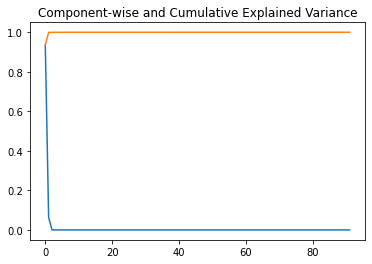

In [101]:
plt.plot(range(val), pca.explained_variance_ratio_)
plt.plot(range(val), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")

In the above graph, the blue line represents component-wise explained variance while the orange line represents the cumulative explained variance. We are able to explain around 100% variance in the dataset using 10% components. 

In [102]:
X = pca_data
X.shape

(827, 92)

In [103]:
clf = RandomForestClassifier(n_estimators=250,min_samples_split=10,min_samples_leaf=39,
                             max_features=6,random_state=0)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [105]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=6, min_samples_leaf=39,
                       min_samples_split=10, n_estimators=250, random_state=0)

In [106]:

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
cf_mat = confusion_matrix(y_train_pred,y_train)
print("Confusion Matrix for train - ")
print(cf_mat)
print("Classification train report - ")
print(classification_report(y_train,y_train_pred))
cf_mat = confusion_matrix(y_test_pred,y_test)
print("Confusion Matrix for test - ")
print(cf_mat)
print("Classification test report for - ")
print(classification_report(y_test,y_test_pred))

Confusion Matrix for train - 
[[521  33]
 [  0   0]]
Classification train report - 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       521
           1       0.00      0.00      0.00        33

    accuracy                           0.94       554
   macro avg       0.47      0.50      0.48       554
weighted avg       0.88      0.94      0.91       554

Confusion Matrix for test - 
[[251  22]
 [  0   0]]
Classification test report for - 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       251
           1       0.00      0.00      0.00        22

    accuracy                           0.92       273
   macro avg       0.46      0.50      0.48       273
weighted avg       0.85      0.92      0.88       273



List of models we have 

5. dimensionality reduced model

In [107]:
# add this model to list 

models.append(clf)

**So we failed to outperform our base model**

List of models we have 

1. baseline model (lowest Type-II error or FP value)
2. transformation + outlier removed model (raw,normalized,standardized)
3. oversampled & undersampled model (raw,normalized,standardized)
4. symmetric model (bias = 0 , using equal hit & non-hit) - This model has been used to predict accuracy(capture variance) of raw data  (raw,normalized,standardized)
5. dimensionality reduced model

In [108]:
print("Hit in train",len(train[train['Outcome']==1]))
print("Hit % in train",len(train[train['Outcome']==1])*100/len(train))
print("Hit in test",len(test[test['Outcome']==1]))
print("Hit % in test",len(test[test['Outcome']==1])*100/len(test))

Hit in train 55
Hit % in train 6.6505441354292625
Hit in test 13
Hit % in test 6.310679611650485


In [109]:
X = test.drop("Outcome", axis=1)
y = test["Outcome"]
column_values = X.columns
feature_X = X.shape[1]
feature_X

154

In [110]:
for i,clf in enumerate(models):
    try:
        y_pred=clf.predict(X)
        cf_mat = confusion_matrix(y_pred,y)
        print(f"Confusion Matrix for model-{i}")
        print(cf_mat)
        print(f"Classification for model-{i}")
        print(classification_report(y,y_pred))
    except:
        print(f"Model-{i} can't be uses as the model was trained on data with different dimension")

Confusion Matrix for model-0
[[193  13]
 [  0   0]]
Classification for model-0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       193
           1       0.00      0.00      0.00        13

    accuracy                           0.94       206
   macro avg       0.47      0.50      0.48       206
weighted avg       0.88      0.94      0.91       206

Model-1 can't be uses as the model was trained on data with different dimension
Model-2 can't be uses as the model was trained on data with different dimension
Confusion Matrix for model-3
[[193  13]
 [  0   0]]
Classification for model-3
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       193
           1       0.00      0.00      0.00        13

    accuracy                           0.94       206
   macro avg       0.47      0.50      0.48       206
weighted avg       0.88      0.94      0.91       206

Model-4 can't be uses as the

Let's check for model -3 

In [111]:
clf = models[3]

Elapsed time to compute the importances: 0.027 seconds
WBN_EN_L_0.75    0.048294
WBN_EN_L_1.00    0.042534
WBN_EN_L_0.25    0.039921
WBN_GC_L_0.75    0.039486
WBN_EN_L_0.50    0.038141
                   ...   
HBA_06_ARC       0.000000
POS_05_HBD       0.000000
POS_06_HBD       0.000000
POS_07_HBD       0.000000
NEG_01_NEG       0.000000
Length: 154, dtype: float64


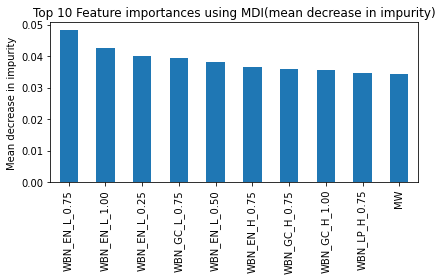

In [112]:
#column_values = X.columns
feature_names = [x for x in column_values]
start_time = time.time()
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

top_10_features = forest_importances[:10]
fig, ax = plt.subplots()
top_10_features.plot.bar(yerr=std[:10], ax=ax)
ax.set_title("Top 10 Feature importances using MDI(mean decrease in impurity)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

print(forest_importances)

In [113]:
X_test = X
y_test = y

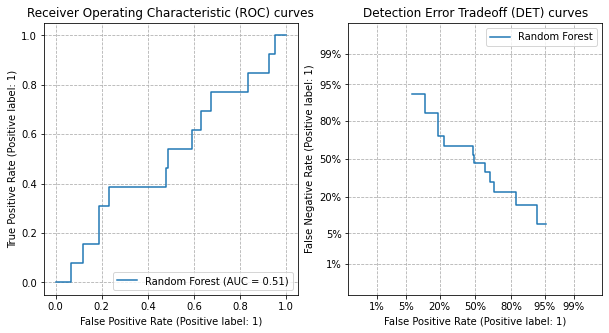

In [114]:
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(10, 5))

RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_roc, name="Random Forest")
DetCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax_det, name="Random Forest")

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

**For unknown test data all model fails miserably , we can try some hyperparameter tuning but that doesn't not guarantee better outcome . Dataset is too imbalance that might be one of the reason for such poor performance . We can use some ensemble or stacked estimators but again that's not too useful for real world business problem**